In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
import numpy as np
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/train.csv')
X = data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X.head()

,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked
0,3,22.0,male,1,0,7.2500,S
1,1,38.0,female,1,0,71.2833,C
2,3,26.0,female,0,0,7.9250,S
3,1,35.0,female,1,0,53.1000,S
4,3,35.0,male,0,0,8.0500,S


In [3]:
y = data[['Survived']]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [4]:
X['Age'].fillna(X['Age'].median(skipna=True), inplace=True)
X['Embarked'].fillna(X['Embarked'].value_counts().idxmax(), inplace=True)

In [5]:
encoder = ce.OrdinalEncoder(cols=['Sex', 'Embarked'])
X = encoder.fit_transform(X)
X

,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked
0,3,22.0,1,1,0,7.2500,1
1,1,38.0,2,1,0,71.2833,2
2,3,26.0,2,0,0,7.9250,1
3,1,35.0,2,1,0,53.1000,1
4,3,35.0,1,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,27.0,1,0,0,13.0000,1
887,1,19.0,2,0,0,30.0000,1
888,3,28.0,2,1,2,23.4500,1
889,1,26.0,1,0,0,30.0000,2


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8)

In [7]:
X_train.shape, y_test.shape

((712, 7), (179, 1))

In [8]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 6],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'reg_alpha': [0.1, 10, 0.01]
}
xgboost = xgb.XGBClassifier()
grid_search = GridSearchCV(xgboost, param_grid, cv=10)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_
print(f"best parameters: {best_params}")
print(f"best score: {best_score}")

best parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 6, 'n_estimators': 100, 'reg_alpha': 0.1, 'subsample': 0.8}
best score: 0.8397496087636933


In [9]:
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [10]:
accuracy_score(y_test, best_model.predict(X_test))

0.8100558659217877

In [11]:
f1_score(y_test, best_model.predict(X_test))

0.7536231884057972

In [12]:
print(confusion_matrix(y_test, best_model.predict(X_test)))

[[93 15]
 [19 52]]


In [13]:
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       108
           1       0.78      0.73      0.75        71

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



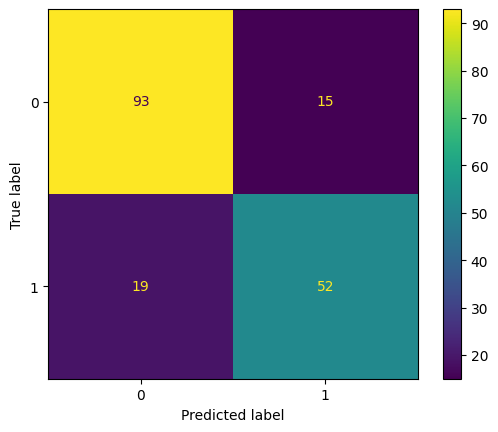

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, best_model.predict(X_test), labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.show()